# Método de Newton-Raphson
## Prueba de derivación usando paquete de álgebra simbólica

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym


Algunos casos de ejemplo. **Correr solo la celda con el caso que se quiere probar.** También se puede cambiar la semilla (x0).
1. $f'(x^*) \neq 0$
2. $f'(x^*) = 0$
3. $\sin(x-1)$
4. $\arctan(x)-\pi/4$

In [2]:
#Caso 1
Sx = sym.Symbol('x')
Sf = Sx**2- 1 #función simbolica
x0 = 2.3 #semilla


In [16]:
#Caso 2
Sx = sym.Symbol('x')
Sf = (Sx-1)**2 #función simbolica
x0 = 2.3 #semilla


In [6]:
#Caso 3
Sx = sym.Symbol('x')
Sf = sym.sin(Sx-1) #función simbolica
x0 = 2.0 #semilla


In [52]:
#Caso 4
Sx = sym.Symbol('x')
Sf = sym.atan(Sx)-sym.pi/4 #función simbolica
x0 = 2.0 #semilla

In [17]:
plt_title = str(Sf) # devuelve la función en formato de string

Sdf = sym.diff(Sf, Sx)#derivada simbolica

f = sym.utilities.lambdify(Sx,Sf) #f es una función "estandar"
df = sym.utilities.lambdify(Sx,Sdf) #df es una función "estandar"

# Función de iteración
Sphi=Sx-Sf/Sdf
phi = sym.utilities.lambdify(Sx,Sphi)
# Derivadas de la función de iteración
Sphi1=sym.diff(Sphi,Sx)
Sphi2=sym.diff(Sphi1,Sx)
Sphi3=sym.diff(Sphi2,Sx)
phi1=sym.utilities.lambdify(Sx,Sphi1)
phi2=sym.utilities.lambdify(Sx,Sphi2)
phi3=sym.utilities.lambdify(Sx,Sphi3)


tol = 1e-6 # Tolerancia: cuando la diferencia entre una aproximación y la siguente sea menor, se detiene
kmax=21 # Número máximo de iteraciones

# Extremos del intervalo de graficación de f(x)
xmin=0
xmax=2.49

# Genera los vectores para graficar, los xg están equiespaciados
xg=np.linspace(xmin,xmax,100)
yg=f(xg)


# Guarda primer punto de la secuencia (x0,0)
x = [x0]
y = [0]

# Inicialización: semilla
xprev = x0
# Inicialización: correcci'on inicial (arbitraria)
corr = 2*tol
# Inicialización: contador
k = 0
# Condiciones de parada:
# - correci'on menor o igual que tol
# - contador mayor o igual que kmax
# - norma de x mayor o igual que 3
while corr > tol and k < kmax and np.linalg.norm(xprev)<3:
    k += 1    # incrementa contador
#iteración propiamente dicha:  
    xnext=xprev-f(xprev)/df(xprev)
# Guarda un par de puntos de la secuencia:
# -Punto sobre y=f(x)
    x.append(xprev)
    y.append(f(xprev))
# -Punto sobre y=0
    x.append(xnext)
    y.append(0)
# Calcula cuánto fue la corrección
    corr=np.linalg.norm(xnext-xprev)
# Guarda último valor de la aproximación en xprev
    xprev = xnext
    
if(corr <= tol): # El método "llegó" a la solución
    print('Raíz encontrada: {:2.2f}'.format(xnext))
    print('Derivadas de la función de iteración:')
    print('1ra: ',Sphi1)
    print('2ra: ',Sphi2)
    print('3ra: ',Sphi3)
    print('Evaluadas en: {:2.2f}'.format(xnext))
    print('1ra: {}'.format(phi1(xnext)))
    print('2ra: {}'.format(phi2(xnext)))
    print('3ra: {}'.format(phi3(xnext)))


Raíz encontrada: 1.00
Derivadas de la función de iteración:
1ra:  (2 - 2*x)/(2*x - 2) + 2*(x - 1)**2/(2*x - 2)**2 + 1
2ra:  -2*(2 - 2*x)/(2*x - 2)**2 - 8*(x - 1)**2/(2*x - 2)**3 - 2/(2*x - 2) + (4*x - 4)/(2*x - 2)**2
3ra:  8*(2 - 2*x)/(2*x - 2)**3 + (16 - 16*x)/(2*x - 2)**3 + 48*(x - 1)**2/(2*x - 2)**4 + 12/(2*x - 2)**2 - 4*(4*x - 4)/(2*x - 2)**3
Evaluadas en: 1.00
1ra: 0.5
2ra: 0.0
3ra: 0.0009765625


Text(0.5, 1.0, '(x - 1)**2')

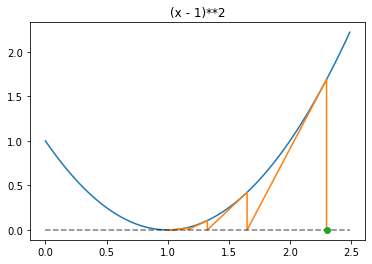

In [18]:
# Grafica: y=x, y=f(x), puntos de la secuencia y la recta y=0
plt.plot(xg, yg)
plt.plot(x, y)
plt.plot(xg,0*xg, 'k', alpha = 0.5, ls = 'dashed')
plt.plot(x0, 0, 'o') # semilla inicial
plt.title(plt_title)

(0.0, 2.49)

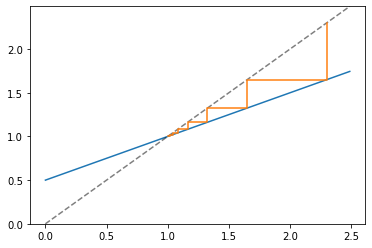

In [19]:
# Grafica: y=x, función de iteración
plt.plot(xg, phi(xg))
plt.plot(xg, xg, 'k', alpha = 0.5, ls = 'dashed')
plt.plot(x[0:-2], x[1:-1])
plt.gca().set_ylim(xmin, xmax)



El orden de convergencia también se puede verificar graficando $\epsilon^{k+1}$ vs $\epsilon^{k}$:

Text(0, 0.5, '$\\epsilon^{k+1}$')

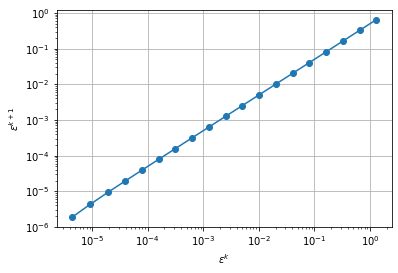

In [22]:
xvalues=np.array(x[1:-1:2])
err=np.abs(xvalues - xnext)
plt.loglog(err[:-2], err[1:-1], 'o-')
plt.grid()
plt.gca().set_xlabel(r'$\epsilon^{k}$')
plt.gca().set_ylabel(r'$\epsilon^{k+1}$')
